In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import os

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class labels and matching suggestions
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
match_dict = {
    "T-shirt": "Jeans, Sneakers, Denim Jacket",
    "Trouser": "Shirt, T-shirt, Loafers",
    "Pullover": "Trousers, Skirt, Scarft",
    "Dress": "	Heels, Handbag, Cardigan",
    "Coat": "Boots, Scarf, Skinny Jeans",
    "Sandal": "Skirt, Summer Dress, Beach Hat",
    "Shirt": "Trousers, Blazer, Formal Shoes",
    "Sneaker": "Joggers, Hoodie, Cap",
    "Bag": "Dress, Casual Wear, Sunglasses",
    "Ankle boot": "Jeans, Leather Jacket, Turtleneck Sweater"
}


In [4]:
# Build and train model (or load if already saved)

model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=5, validation_data=(x_test, y_test_cat))


Epoch 1/5


c:\Users\ASHIRWAD\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7810 - loss: 0.6099 - val_accuracy: 0.8748 - val_loss: 0.3500
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8867 - loss: 0.3103 - val_accuracy: 0.8930 - val_loss: 0.2947
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9029 - loss: 0.2621 - val_accuracy: 0.8937 - val_loss: 0.2833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9164 - loss: 0.2220 - val_accuracy: 0.9066 - val_loss: 0.2575
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9276 - loss: 0.1937 - val_accuracy: 0.9154 - val_loss: 0.2417


In [5]:
model.save("fashion_mnist_model.h5")

In [6]:
def predict_and_suggest(image, model):
    if image.shape != (28, 28, 1):
        image = image.reshape(28, 28, 1)
    # Do NOT normalize again if already normalized
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    class_label = class_names[predicted_class]
    suggestion = match_dict[class_label]

    plt.imshow(image[0].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {class_label}\nMatch Suggestion: {suggestion}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {class_label}")
    print(f"Suggested Match: {suggestion}")


In [7]:
# Predict from custom image file
def predict_custom_image(image_path, model, class_names, match_dict):
    img = load_img(image_path, color_mode='grayscale', target_size=(28, 28))
    img_array = img_to_array(img)
    img_array = img_array.reshape(1, 28, 28, 1)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_label = class_names[predicted_class]
    suggestion = match_dict[class_label]

    plt.imshow(img_array[0].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {class_label}\nMatch Suggestion: {suggestion}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {class_label}")
    print(f"Suggested Match: {suggestion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Users\ASHIRWAD\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


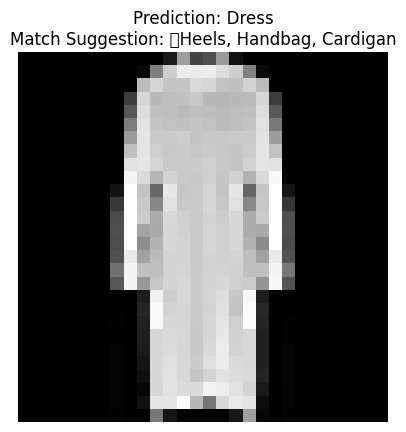

Predicted Class: Dress
Suggested Match: 	Heels, Handbag, Cardigan


In [8]:
sample_image = x_test[67]
predict_and_suggest(sample_image, model)

In [9]:
import pickle

# Assuming 'model' is your trained model
with open("fashion_pred.pkl", "wb") as file:
    pickle.dump(model, file)

